# Используется материал бесплатного курса [mlcource.ai](https://mlcourse.ai/book/topic01/topic01_pandas_data_analysis.html)

## 1. Импорт библиотек и данных

In [1]:
# Matplotlib forms basis for visualization in Python
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# We will use the Seaborn library
import seaborn as sns

sns.set()

# Graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format = 'svg'

In [2]:
# for Jupyter-book, we copy data from GitHub, locally, to save Internet traffic,
# you can specify the data/ folder from the root of your cloned
# https://github.com/Yorko/mlcourse.ai repo, to save Internet traffic
DATA_URL = "https://raw.githubusercontent.com/Yorko/mlcourse.ai/main/data/"

In [3]:
df = pd.read_csv(DATA_URL + "telecom_churn.csv")

In [4]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


## 2. Одномерная визуализация

Однофакторный анализ рассматривает одну переменную за раз. Когда мы анализируем переменную отдельно, нас обычно больше всего интересует распределение её значений, а другие переменные в наборе данных мы игнорируем.

Ниже мы рассмотрим различные статистические типы признаков и соответствующие инструменты для их индивидуального визуального анализа.

### 2.1 Количественные характеристики

Количественные признаки принимают упорядоченные числовые значения. Эти значения могут быть дискретными, например, целыми числами, или непрерывными, например, действительными числами, и обычно отражают количество или измерение.

Самый простой способ посмотреть на распределение числовой переменной — построить её гистограмму с помощью DataFrameметода hist().

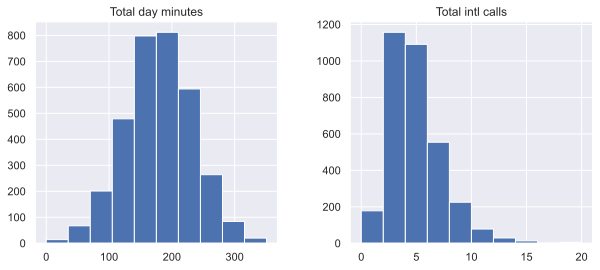

In [7]:
features = ["Total day minutes", "Total intl calls"]
df[features].hist(figsize=(10, 4));

Гистограмма группирует значения в интервалыравного диапазона значений. Форма гистограммы может указывать на тип распределения: гауссовское, экспоненциальное и т. д. Вы также можете заметить асимметрию в её форме, если распределение почти равномерное, но с некоторыми аномалиями. Знание распределения значений признаков становится важным при использовании методов машинного обучения, которые предполагают определённый тип распределения (чаще всего гауссовское).

На приведённом выше графике мы видим, что переменная Общее количество минут в день распределена нормально, в то время как Общее количество международных звонков сильно смещена вправо (хвост распределения длиннее справа).

Есть и другой, зачастую более понятный способ представления распределения: графики плотности или, более формально, ядровые графики плотности. Их можно считать сглаженной версией гистограммы. Их главное преимущество перед гистограммой заключается в том, что они не зависят от размера ячеек. Давайте построим графики плотности для тех же двух переменных:

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>]], dtype=object)

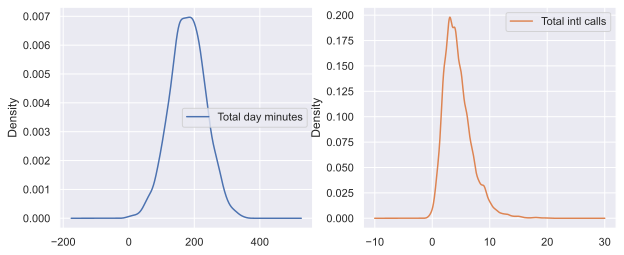

In [8]:
df[features].plot(kind="density",subplots=True,layout=(1,2),sharex=False,figsize=(10, 4))

Также можно построить график распределения наблюдений с помощью seaborn’s histplot(). Например, давайте посмотрим на распределение Общего количества минут в сутках. Давайте построим гистограмму с оценкой плотности ядра (ОПЯ) сверху.

Высота столбцов гистограммы здесь нормирована и показывает плотность, а не количество примеров в каждой ячейке.

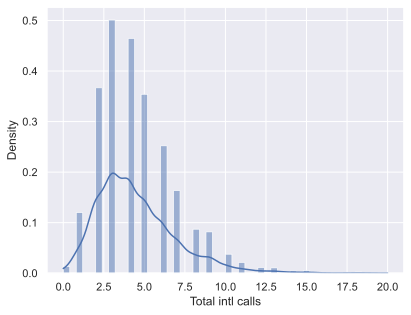

In [9]:
sns.histplot(df["Total intl calls"], kde=True, stat="density");

### График - коробка

Ещё один полезный тип визуализации — это ящик с усами. seaborn отлично справляется с этой задачей:

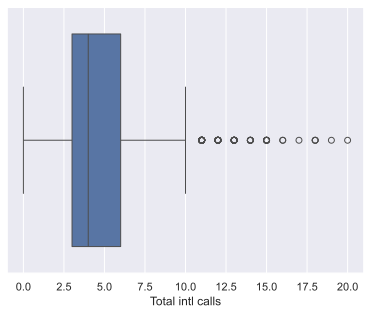

In [10]:
sns.boxplot(x="Total intl calls", data=df);

Давайте посмотрим, как интерпретировать ящик с усами. Его компоненты — это ящик (очевидно, поэтому он и называется ящиком с усами), так называемые усы и несколько отдельных точек (выбросы).

Коробка сама по себе иллюстрирует межквартильный разброс распределения; её длина определяется 
25% ($Q1$) и 75% ($Q3$) процентилями. Вертикальная линия внутри прямоугольника обозначает медиану (50%) о распределении.

«Усы» — это линии, отходящие от прямоугольника. Они представляют собой всю совокупность точек данных, в частности точки, попадающие в интервал ($Q1-1.5\cdot IQR,Q3+1.5\cdot IQR$), где $OQR=Q3-Q1 $ это межквартильный размах.

Выбросы, выходящие за пределы диапазона, ограниченного «усами», отображаются в виде отдельных чёрных точек вдоль центральной оси.

Мы видим, что в наших данных довольно редко встречается большое количество международных звонков.

### График-Скрипка

Последний тип диаграмм распределения, который мы рассмотрим, — это диаграмма размаха.

Посмотрите на рисунки ниже. Слева мы видим уже знакомый нам ящичковый график. Справа — диаграмма размаха с оценкой плотности ядра с обеих сторон.

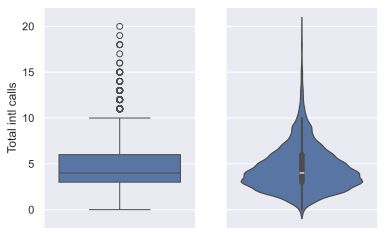

In [11]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(6, 4))
sns.boxplot(data=df["Total intl calls"], ax=axes[0])
sns.violinplot(data=df["Total intl calls"], ax=axes[1]);

Разница между ящиком и диаграммой размаха заключается в том, что первая иллюстрирует определённую статистику по отдельным примерам в наборе данных, в то время как диаграмма размаха в большей степени фокусируется на сглаженном распределении в целом.

В нашем случае диаграмма размаха не даёт никакой дополнительной информации о данных, поскольку всё ясно уже из диаграммы «ящик с усами».

### Describe()

Помимо графических инструментов, для получения точных числовых статистических данных о распределении можно использовать метод describe() DataFrame:

In [12]:
df[features].describe()

,Total day minutes,Total intl calls
count,3333.000000,3333.000000
mean,179.775098,4.479448
std,54.467389,2.461214
min,0.000000,0.000000
25%,143.700000,3.000000
50%,179.400000,4.000000
75%,216.400000,6.000000
max,350.800000,20.000000
